Dataset Shape: (303, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


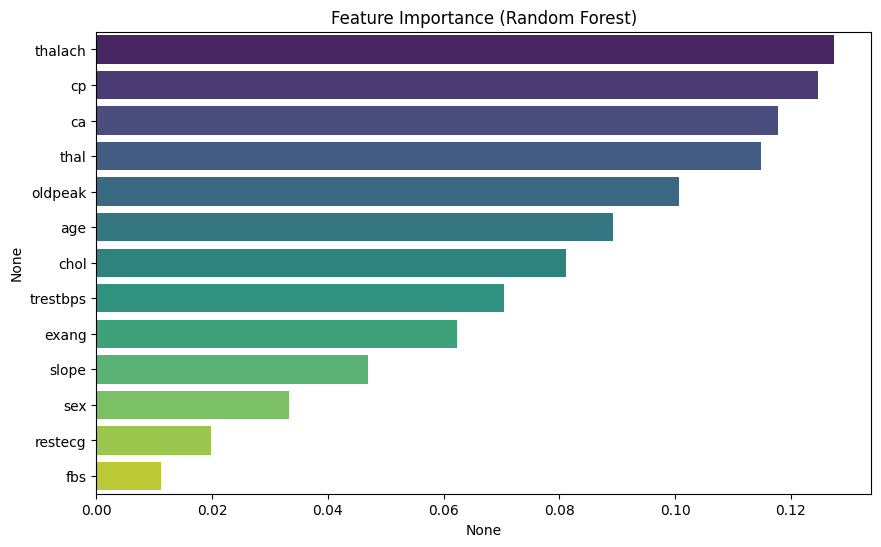

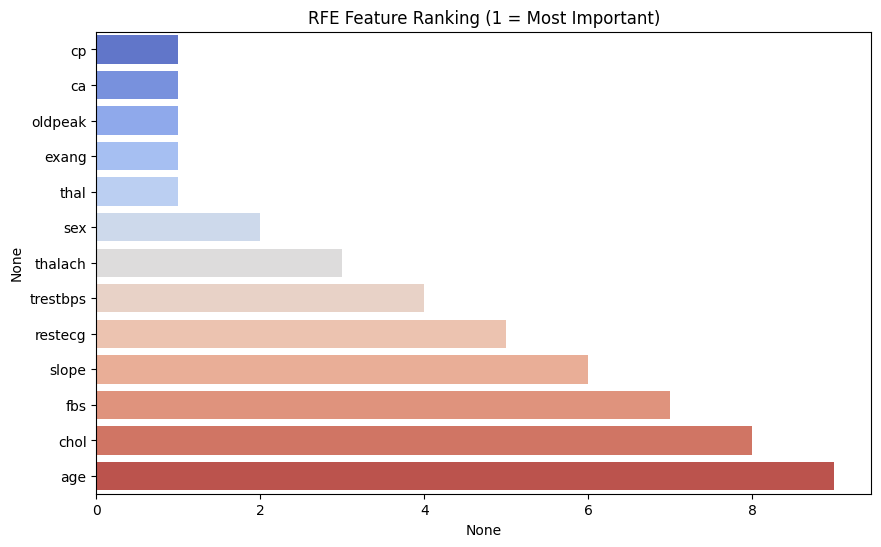


Top 5 Features from RFE: ['cp', 'exang', 'oldpeak', 'ca', 'thal']


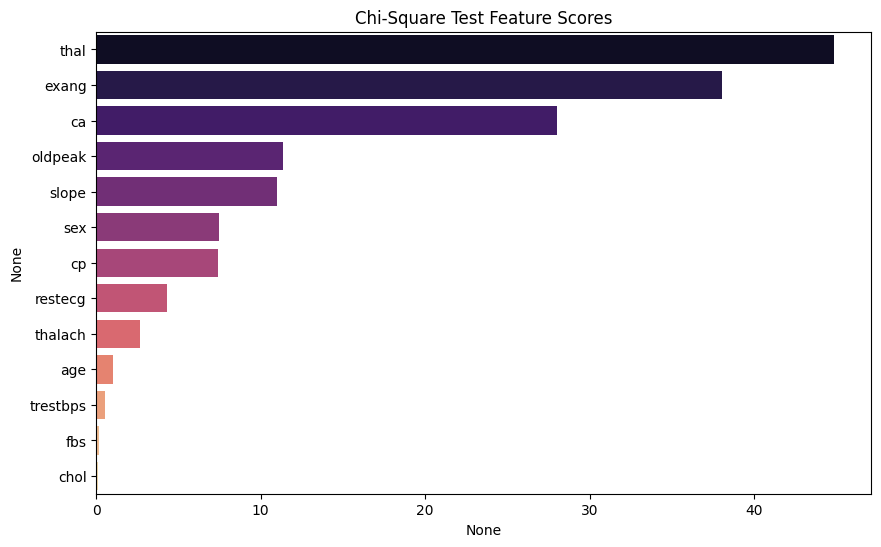


Top Features from Chi-Square Test: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

Final Selected Features for Modeling: ['thal', 'exang', 'thalach', 'slope', 'oldpeak', 'ca', 'cp']

✅ Feature Selection Complete! Reduced dataset saved as 'heart_disease_selected.csv'


In [1]:
# 1. Import Libraries
# =========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE, chi2, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from matplotlib_venn import venn3, venn3_circles

# =========================
# 2. Load Cleaned Dataset
# =========================
data = pd.read_csv("/content/heart_disease_cleaned.csv")

print("Dataset Shape:", data.shape)
print("Columns:", list(data.columns))

# Target column is 'num'
target_col = "num"
X = data.drop(columns=[target_col])
y = data[target_col]

# Convert target to binary (0 = no disease, 1 = disease present)
y = y.apply(lambda x: 1 if x > 0 else 0)

# =========================
# 3. Feature Importance - Random Forest
# =========================
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index, hue=importances.index,
            dodge=False, legend=False, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.show()

# =========================
# 4. Recursive Feature Elimination (RFE)
# =========================
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

rfe_ranking = pd.Series(rfe.ranking_, index=X.columns).sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=rfe_ranking, y=rfe_ranking.index, hue=rfe_ranking.index,
            dodge=False, legend=False, palette="coolwarm")
plt.title("RFE Feature Ranking (1 = Most Important)")
plt.show()

selected_features_rfe = X.columns[rfe.support_]
print("\nTop 5 Features from RFE:", list(selected_features_rfe))

# =========================
# 5. Chi-Square Test
# =========================
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

chi2_selector = SelectKBest(score_func=chi2, k="all")
chi2_selector.fit(X_scaled, y)

chi2_scores = pd.Series(chi2_selector.scores_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=chi2_scores, y=chi2_scores.index, hue=chi2_scores.index,
            dodge=False, legend=False, palette="magma")
plt.title("Chi-Square Test Feature Scores")
plt.show()

chi2_features = X.columns[chi2_selector.get_support()]
print("\nTop Features from Chi-Square Test:", list(chi2_features))

# =========================
# 6. Combine Results
# =========================
final_selected = list(set(list(importances.index[:5]) +
                          list(selected_features_rfe) +
                          list(chi2_scores.index[:5])))

print("\nFinal Selected Features for Modeling:", final_selected)

# Save reduced dataset
reduced_df = data[final_selected + [target_col]]
reduced_df.to_csv("heart_disease_selected.csv", index=False)

print("\n✅ Feature Selection Complete! Reduced dataset saved as 'heart_disease_selected.csv'")